#John Asencio

##Data Engineering
###Data Ethics

#B. [MUST] Model Based Synthesis
Your job is to synthesize a data set based on the employees.csv data set

This startup company of 320 employees intends to go public and become a 10,000 employee company. Your job is to produce an expanded 10K record synthetic database to help the founders understand personnel-related issues that might occur with the expanded company.

Use the Faker python module to produce a 10K employee dataset. Follow these constraints:

All columns in the current data set must be preserved. It is not necessary to preserve any of the actual data from the current database

Need to keep track of social security numbers

The database should keep track of the languages (other than English) spoken by each employee. Each employee speaks 0, 1 or 2 languages in addition to English.

To grow, the company plans to sponsor visas and hire non-USA citizens. So your synthetic database should include names of employees from India, Mainland China, Canada, South Korea, Philippines, Taiwan and Mexico. These names should be in proportion to the 2019 percentages of H1B petitions from each country.

The expanded company will have additional departments include “Legal” (approximately 5% of employees), “Marketing” (10%), “Administrative” (10%), “Operations” (20%), “Sales” (10%), “Finance” (5%) and “I/T” (10%) to go along with the current “Product” (20%) and “Human Resource” (10%) departments.

Salaries in each department must mimic the typical salaries for professionals in each field. You can find appropriate data for each type of profession at salary.com For example, see this page to find a model estimate for your synthetic marketing department: https://www.salary.com/research/salary/benchmark/marketing-specialist-salary

The current startup company (as represented by the employees.csv data) is skewed toward male employees. Our goal for the new company is to make the numbers of men and women approximately equal.

Save your new database to your repository alongside your code that synthesized the data.


In [3]:
pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.0 MB/s eta 0:00:00


In [5]:
import pandas as pd
from faker import Faker

fake = Faker()

data = pd.read_csv('employees.csv')

In [5]:
#getting the columns
columns = ['First Name', 'Last Name', 'Email', 'Phone', 'Gender', 'Age', 'Job Title', 'Years of Experience', 'Department', 'Salary', 'Gender', 'Country', 'Additional Languages']

In [1]:
country_proportions = {
    'India': 0.745,
    'China': 0.118,
    'Canada': 0.01,
    'South Korea': 0.009,
    'Phillipines': 0.006,
    'Taiwan': 0.006,
    'Mexico': 0.006,
    'USA': 0.01
}

salary_ranges = {
    'Legal': (50000, 150000),
    'Marketing': (50000, 110000),
    'Administrative': (30000, 70000),
    'Operations': (40000, 100000),
    'Sales': (40000, 120000),
    'Finance': (50000, 130000),
    'IT': (60000, 140000),
    'Product': (70000, 150000),
    'Human Resource': (40000, 90000)
}

languages = ['Spanish', 'Chinese', 'French', 'German', 'Hindi', 'Arabic']


departments = {
    'Legal': 0.05,
    'Marketing': 0.10,
    'Administrative': 0.10,
    'Operations': 0.20,
    'Sales': 0.10,
    'Finance': 0.05,
    'IT': 0.10,
    'Product': 0.20,
    'Human Resource': 0.10
}

In [6]:
import random

def generate_employee():
    gender = random.choice(['Male', 'Female'])
    department = random.choices(list(departments.keys()), weights=departments.values())[0]
    salary = random.randint(salary_ranges[department][0], salary_ranges[department][1])
    country = random.choices(list(country_proportions.keys()), weights=country_proportions.values())[0]

    employee = {
        'name': fake.name(),
        'ssn': fake.ssn(),
        'department': department,
        'salary': salary,
        'gender': gender,
        'country': country,
        'additional_languages': ', '.join(random.sample(languages, random.randint(0, 2)))
    }

    return employee

#employee generation
employees = [generate_employee() for _ in range(10000)]

#convert to dataframe
df = pd.DataFrame(employees)

#equal number of males and females
num_females = df[df['gender'] == 'Female'].shape[0]
num_males = df[df['gender'] == 'Male'].shape[0]
while num_males > num_females + 1:
    idx = df[df['gender'] == 'Male'].sample(1).index
    df.loc[idx, 'gender'] = 'Female'
    num_females += 1
    num_males -= 1

#save to CSV
df.to_csv('synthetic_employees.csv', index=False)

print("Synthetic dataset generated and saved as 'synthetic_employees.csv'.")

Synthetic dataset generated and saved as 'synthetic_employees.csv'.


In [7]:
# just making sure that 10,000 employees were written in
employee_count = df.shape[0]
print(f'Total number of employees: {employee_count}')


Total number of employees: 10000


#C. [SHOULD] Analyze the Synthetic Company


###How many men vs. women will we need to hire in each department?


In [8]:
gender_counts = df['gender'].value_counts()

print(gender_counts)

gender
Male      5000
Female    5000
Name: count, dtype: int64


<ipython-input-12-04e7b6e7edf4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')


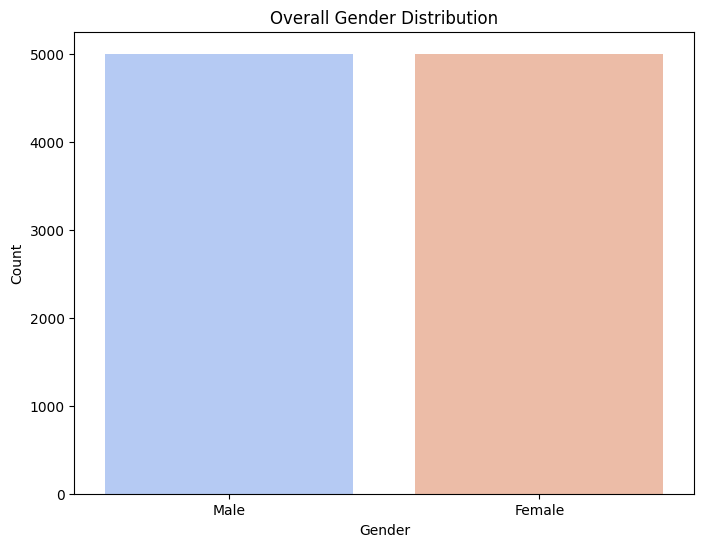

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')
plt.title('Overall Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


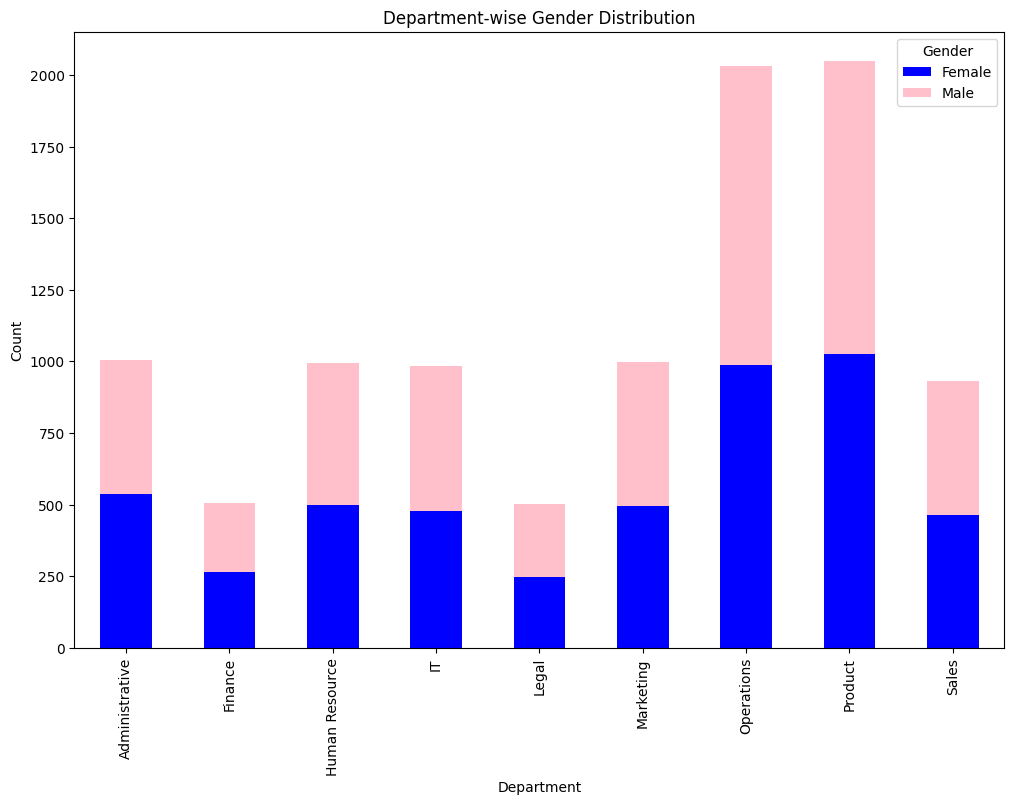

In [13]:
department_gender_counts = df.groupby('department')['gender'].value_counts().unstack(fill_value=0)

department_gender_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=['blue', 'pink'])
plt.title('Department-wise Gender Distribution')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

###How much will this new company pay in yearly payroll?


In [14]:
total_payroll = df['salary'].sum()

print(f"Total Payroll: ${total_payroll:,.2f}")

Total Payroll: $829,374,600.00
